In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [3]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
clf = decision_tree_model.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=42)

In [4]:
y_pred = decision_tree_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.8868330464716007


In [6]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      1829
           1       0.67      0.92      0.78       495

    accuracy                           0.89      2324
   macro avg       0.82      0.90      0.85      2324
weighted avg       0.91      0.89      0.89      2324



In [7]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

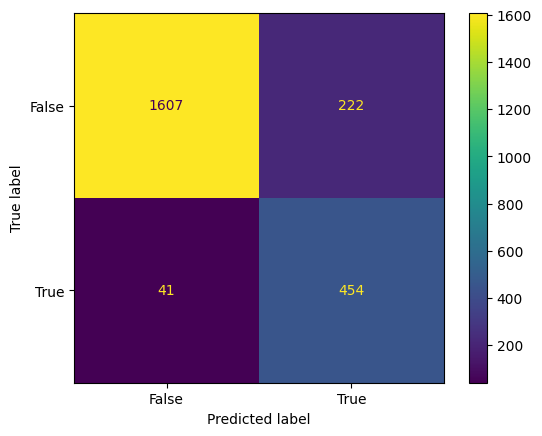

In [8]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
#Implementação do Grid Search

In [10]:
param_grid ={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [11]:
grid_search = GridSearchCV(decision_tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [12]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}


In [13]:
best_decision_tree_model = grid_search.best_estimator_


In [14]:
best_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [15]:
grid_pred = best_decision_tree_model.predict(X_test)

In [16]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9049053356282272


In [17]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1829
           1       0.84      0.68      0.75       495

    accuracy                           0.90      2324
   macro avg       0.88      0.82      0.85      2324
weighted avg       0.90      0.90      0.90      2324



In [18]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

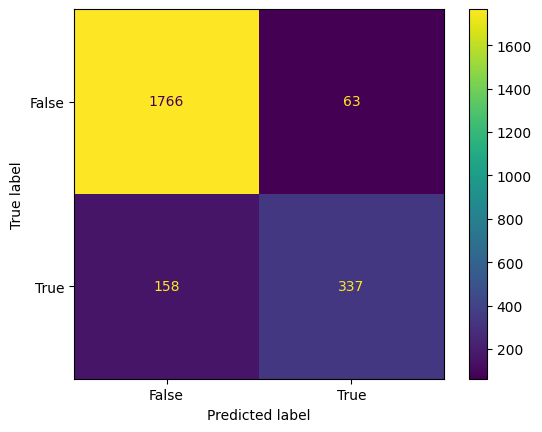

In [19]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

processed_test_text = finalpreprocess(test_text)

print("Texto de teste após pré-processamento:", processed_test_text)

prediction = best_decision_tree_model.predict(processed_test_text)

if prediction[0]:
    print("O texto é spam!")
else:
    print("O texto não é spam (ham)!")